<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch01_02_DNN%EA%B8%B0%EC%B4%88_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC%EC%9D%B4%EC%9A%A9%ED%95%9C%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜:
* 이름:

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


In [1]:
import numpy as np
import tensorflow as tf
tf.__version__

'2.8.2'

## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [2]:
# 모든 레이어는 tensorflow.keras에 있다.
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name='input_layer') # X : (데이터개수,3)
y = layers.Dense(1, name='output_layer')(x) # Linear : W, b  Dense(output_shape)

model1 = models.Model(inputs=x, outputs=y, name='Model_1')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


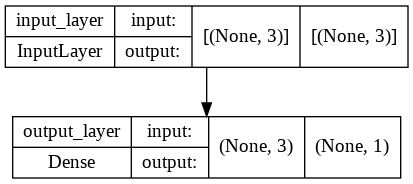

In [3]:
from tensorflow.keras import  utils

# Output shape : 데이터 변환 과정
# None: 데이터 개수
# Param # : 파라미터 개수 
model1.summary()
utils.plot_model(model1, show_shapes=True)

# Trainable param : 학습 가능한 파라미터 (역전파 통해서 업데이트)
# Non-trainable param : 학습 하지 않는 파라미터

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `model.layers.output`


In [4]:
# output : 데이터의 변환 과정
for layer in model1.layers:
  print(layer.name) # 각 레이어의 이름
  print(layer.output.shape) # 각 레이어의 아웃풋의 shape

input_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [5]:
'''
W : (3, 1)
B : (1, )
'''
for param in model1.get_weights():
  print(param.shape)

print(model1.get_weights())

(3, 1)
(1,)
[array([[-0.47321367],
       [ 0.8683027 ],
       [ 0.96046674]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [6]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model1.predict(X)
print(Y_pred)

[[ 0.56052476  1.75934639 -0.05521461]]
[[1.2093655]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [7]:
x = layers.Input(shape=(3), name='input_layer') # X : (데이터개수,3)
y = layers.Dense(2, name='output_layer')(x) # Linear : W, b  Dense(output_shape)

model2 = models.Model(inputs=x, outputs=y, name='Model_2')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


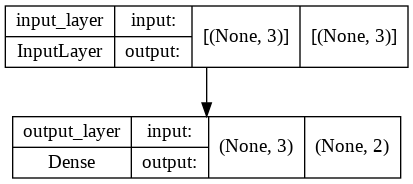

In [13]:
model1.summary()
utils.plot_model(model2, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [8]:
for layer in model2.layers:
  print(layer.name)
  print(layer.output.shape)

input_layer
(None, 3)
output_layer
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [10]:
for param in model2.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 2)
(2,)
[array([[ 0.7967323 ,  0.6102799 ],
       [-0.9364006 , -0.1725961 ],
       [ 0.52837896,  0.63038695]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [11]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model2.predict(X)
print(Y_pred)

[[-2.22319979  0.08888775 -0.27105306]]
[[-1.9977485 -1.5429841]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

In [20]:
x = layers.Input(shape=(3), name='input_layer')
y = layers.Dense(3, name='hidden_layer')(x)
h = layers.Dense(2, name='output_layer')(y)

model3 = models.Model(inputs=x ,outputs=h, name='Model_3')

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


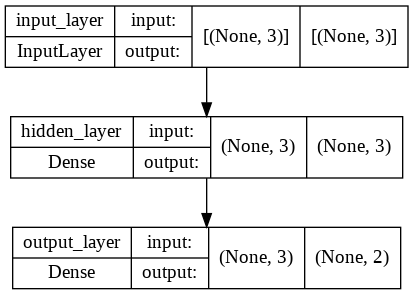

In [21]:
model1.summary()
utils.plot_model(model3, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [24]:
for layer in model3.layers:
  print(layer.name)
  print(layer.output.shape)

input_layer
(None, 3)
hidden_layer
(None, 3)
output_layer
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [25]:
for param in model3.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 3)
(3,)
(3, 2)
(2,)
[array([[ 0.7881639 , -0.26423144, -0.85431623],
       [ 0.71987724,  0.8736496 , -0.98349667],
       [ 0.8342421 ,  0.8439262 , -0.78760505]], dtype=float32), array([0., 0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [26]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = model3.predict(X)
print(Y_pred)

[[-0.19291981 -0.71382236  1.72484369]]
[[0.9232777 1.316938 ]]


### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


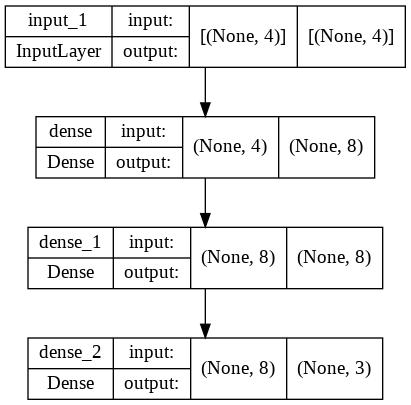

In [27]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape=(4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs=x, outputs=y, name='Model_4')

model4.summary()
utils.plot_model(model4, show_shapes=True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [28]:
'''
X : (N,4) N은 데이터 개수
Z1: (N,8)
Z2: (N,8)
Y : (N,3)
'''

for layer in model4.layers:
  print(layer.output.shape)

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [29]:
'''
W1 : (4, 8)
B1 : (8,)
W2 : (8, 8)
B2 : (8,)
W3 : (8, 3)
B3 : (3,)
'''

for param in model4.get_weights():
  print(param.shape)

print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[-0.46052697,  0.21455896,  0.58049446,  0.2551142 ,  0.6117924 ,
         0.4642492 , -0.4569794 ,  0.64058214],
       [-0.01351631,  0.05735004,  0.01204103, -0.30400252, -0.46308345,
         0.1482721 , -0.64849234, -0.10536933],
       [-0.2563631 , -0.24498749, -0.17679358, -0.4132446 , -0.04137975,
        -0.18809885,  0.05402672, -0.33004504],
       [-0.538795  ,  0.08471078,  0.6950477 , -0.40994266,  0.22984076,
         0.5037276 , -0.52529895, -0.02329087]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[-0.04194683, -0.17994794, -0.03184587,  0.46332997, -0.2132096 ,
        -0.5223985 ,  0.51008886,  0.2515087 ],
       [-0.4668758 , -0.35399047, -0.44109857,  0.08812314,  0.3709466 ,
         0.27755046,  0.05176497, -0.53859615],
       [-0.45599258, -0.19026628,  0.5053279 ,  0.02729589, -0.23302749,
        -0.20177552,  0.36574805, -0.01986331],
       [-0.4266731 ,  0.6069779 , -0.177840

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [30]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.83034489 -0.1954354   1.33161897 -0.37447761]] (1, 4)
Y_pred: [[-0.54275715  0.32212198  0.30101907]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model4를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [31]:
# 실제 데이터  (1000~100000 중에 배치 단위로 계산이 진행됨 ) 배치 사이즈 : 8, 16, 32, 64, ...
X = np.random.normal(size=(10,4)) # 배치의 개수가 10개다
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[-0.01101619  0.05106864 -0.07755594  1.10334025]
 [-0.70462443  1.79040298 -0.10763099  1.71406432]
 [ 1.45344581 -0.1688474  -1.6325097  -0.92949887]
 [ 0.12259926 -0.45802313  0.40840975 -0.72708129]
 [-0.69941169  1.44991776  0.31029247 -0.22253882]
 [ 2.54608618  1.10160523  0.38513987  0.11681232]
 [ 0.42077889  2.11436922  0.83892561 -0.70373048]
 [-0.87468593 -0.25797287 -0.44161846 -0.65366971]
 [ 0.03165795 -0.65235297 -0.24837108 -0.46093264]
 [ 0.27651446 -0.15071939  0.39920445 -1.14924235]] (10, 4)
Y_pred: [[ 0.19498336  0.45516938 -0.39125907]
 [ 2.6852946  -0.30829793 -0.90625584]
 [-2.2267692   2.0231135  -1.2699573 ]
 [-0.5400256  -0.25802907  0.52987427]
 [ 2.200688   -1.208278    0.02354056]
 [-1.0643601   2.7839484  -1.8732774 ]
 [ 1.9664586  -0.36180794 -0.54802924]
 [ 0.28901303 -1.0924754   0.6411915 ]
 [-0.8501316   0.02658086  0.28525525]
 [-0.43283564 -0.27653438  0.43286186]] (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


In [32]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import numpy as np
tf.__version__

'2.8.2'

아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [35]:
def Build_Model(Model_Start_Number, Model_Index_List):
    x = layers.Input(shape=(Model_Start_Number,))
    y = layers.Dense(Model_Index_List[0])(x)
    del Model_Index_List[0]
    for Index_To_Model in Model_Index_List:
        y = layers.Dense(Index_To_Model)(y)
    Model = models.Model(x, y)
    return Model

* 시각화

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 6)                 24        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


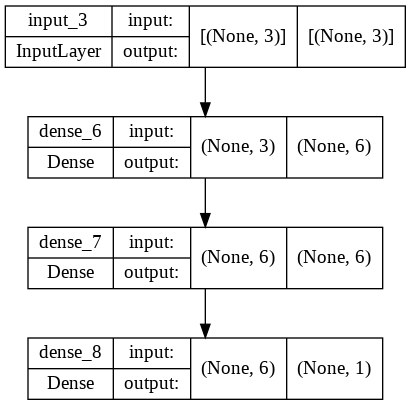

In [36]:
m1 = Build_Model(3, [6,6,1])
m1.summary()
utils.plot_model(m1, show_shapes=True)

In [57]:
X = np.random.normal(size=(1,3))
print(X) 
Y_pred = m1.predict(X)
print(Y_pred)

[[-0.48413394  0.97830823 -0.73049802]]
[[0.80830663]]


### | Keras Sequential API



* 모델 구현: `Sequential()`

In [37]:
def build_model2():
  model = tf.keras.Sequential() # 빈 껍질을 만들어 놓은것
  model.add( layers.Input(shape=(3,)) )
  model.add( layers.Dense(6))
  model.add( layers.Dense(6))
  model.add( layers.Dense(1))
  return model

In [51]:
def Build_Model(Model_Start_Number, Model_Index_List, Model_Mode='Basic'):
    if Model_Mode == 'Basic':
        print('None Selact Mode')

    elif Model_Mode == 'KFA':
        x = layers.Input(shape=(Model_Start_Number,))
        y = layers.Dense(Model_Index_List[0])(x)
        del Model_Index_List[0]
        for Index_To_Model in Model_Index_List:
            y = layers.Dense(Index_To_Model)(y)
        Model = models.Model(x, y)
        return Model
    
    elif Model_Mode == 'KSA':
        model = tf.keras.Sequential()
        model.add( layers.Input(shape=(Model_Index_List[0],)) )
        del Model_Index_List[0]
        for Index_To_Model in Model_Index_List:
            model.add( layers.Dense(Index_To_Model))

        return model

* 모델 시각화

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


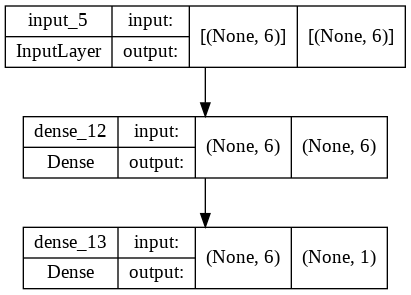

In [42]:
m2 = Build_Model(3, [6,6,1], 'KSA')
m2.summary()
utils.plot_model(m2, show_shapes=True)

### | Model Class Subclassing

* 모델 구현

In [43]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(3)
    self.dense1 = layers.Dense(6, name='dense1')
    self.dense2 = layers.Dense(6, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  21        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


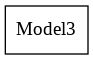

In [44]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_22 (Dense)            (None, 8)                 40        
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


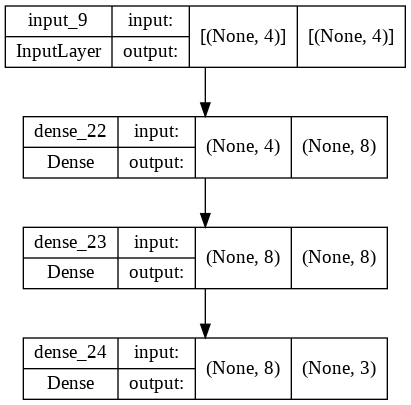

In [52]:
M1 = Build_Model(4, [8,8,3], 'KFA')
M1.summary()
utils.plot_model(M1, show_shapes=True)

* keras Sequential API


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 3)                 27        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


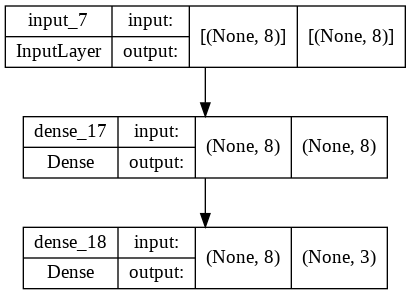

In [46]:
M1 = Build_Model(4, [8,8,3], 'KSA')
M1.summary()
utils.plot_model(M1, show_shapes=True)

* Model Class Subsclassing




In [47]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(4)
    self.dense1 = layers.Dense(8, name='dense1')
    self.dense2 = layers.Dense(8, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  32        
                                                                 
 dense2 (Dense)              multiple                  72        
                                                                 
 dense3 (Dense)              multiple                  27        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


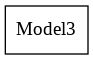

In [48]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)

#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_25 (Dense)            (None, 4)                 16        
                                                                 
 dense_26 (Dense)            (None, 8)                 40        
                                                                 
 dense_27 (Dense)            (None, 4)                 36        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


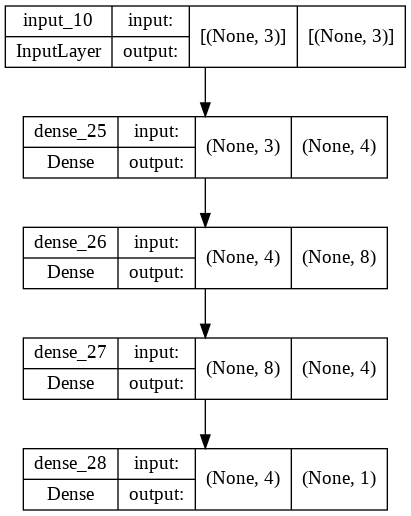

In [53]:
M1 = Build_Model(3, [4,8,4,1], 'KFA')
M1.summary()
utils.plot_model(M1, show_shapes=True)

* keras Sequential API


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 8)                 40        
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


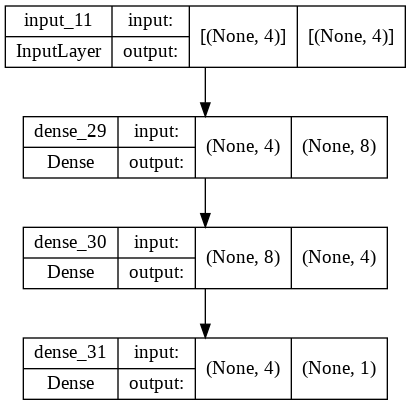

In [54]:
M1 = Build_Model(3, [4,8,4,1], 'KSA')
M1.summary()
utils.plot_model(M1, show_shapes=True)

* Model Class Subsclassing



In [55]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name = 'Model3'
    self._input_shape=(3)
    self.dense1 = layers.Dense(4, name='dense1')
    self.dense2 = layers.Dense(8, name='dense2')
    self.dense3 = layers.Dense(4, name='dense3')
    self.dense4 = layers.Dense(1, name='dense4')
  
  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    y = self.dense4(y)
    return y

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  16        
                                                                 
 dense2 (Dense)              multiple                  40        
                                                                 
 dense3 (Dense)              multiple                  36        
                                                                 
 dense4 (Dense)              multiple                  5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


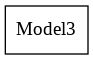

In [56]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3)